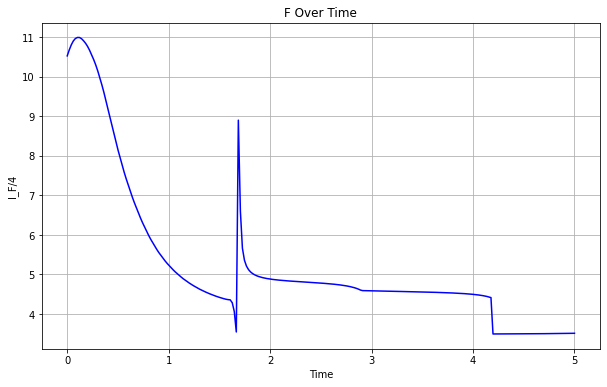

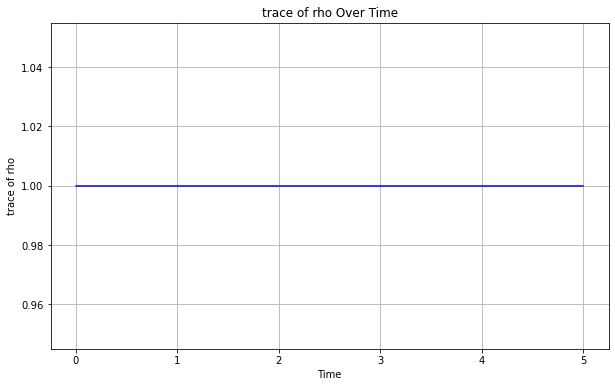

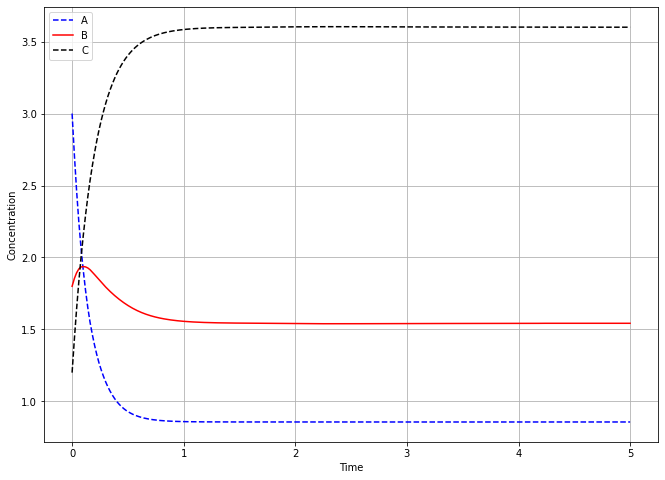

[10.53050152612952, 10.68149745091398, 10.810616475164494, 10.90847511807376, 10.96945725348992, 10.996780119700517, 10.995942589272545, 10.966642613316608, 10.914440716433859, 10.850601203578968, 10.769485197632655, 10.669662349307892, 10.555457093930173, 10.435338021321456, 10.301328965980034, 10.147960587768598, 9.978325574001659, 9.79904664709887, 9.606535046534912, 9.39922927337383, 9.184400421739738, 8.97353993999062, 8.762057716410489, 8.545349387139414, 8.332320453378966, 8.13546865243995, 7.948410291671024, 7.760417540847477, 7.578422313243763, 7.411871159198803, 7.257131238619817, 7.101846439882287, 6.950817249162913, 6.810661888533716, 6.680702513319634, 6.550757265619097, 6.424305673082891, 6.306422878417216, 6.197970946791006, 6.090318616481355, 5.9859818397868025, 5.88905459211832, 5.80112101996767, 5.714348097870985, 5.6302938797687325, 5.552179992388552, 5.481923604063184, 5.41284730669808, 5.345665419494534, 5.282848164029353, 5.226370703162285, 5.171027978961188, 5.11

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def reaction(y, t,kf,kr):
    A, B, C= y
    dAdt = -2*kf* A + kr * B + kr * C
    dBdt = -(kf+kr)* B + kf * A + kr * C
    dCdt = -2*kr* C + kf * B + kf * A
    
    return [dAdt, dBdt, dCdt]

y0 = [1.18243521, 1.81756479, 3.        ]

abserr = 2
relerr = 2
stoptime = 5
numpoints = 250
t = np.linspace(0, stoptime, numpoints)
kf = 3
kr = 1

F_values = [] 
trace_of_rho= []

s = odeint(reaction, s[-1], t, args=(kf, kr), atol=abserr, rtol=relerr)


for idx,(A, B,C) in enumerate(s):
    J = np.array([[-2*kf, kr,kr], 
                  [kf, -(kf+kr), kr],
                  [kf,kf, -2*kr]])
    
    rates =np.array([[ -2*kf* A + kr * B + kr * C], 
                     [ -(kf+kr)* B + kf * A + kr * C], 
                     [-2*kr* C + kf * B + kf * A]])
    norm= np.linalg.norm(rates)
    normalized_rates = rates / (norm)
    row_matrix = normalized_rates.T

    rho = normalized_rates @ row_matrix
    #print(rho)
    r=np.trace(rho)

    F = np.trace(J @ J.T @ rho) - (np.trace(J @ rho)) ** 2
    F_values.append(F)
    trace_of_rho.append(r)
    #print(normalized_rates)
    #print(np.linalg.norm(rates))


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, F_values, label='F over time', color='blue', linestyle='-', markersize=5)
plt.xlabel('Time')
plt.ylabel('I_F/4')
plt.title('F Over Time')
#plt.ylim(0,1.5)
plt.grid()


plt.figure(figsize=(10, 6))
plt.plot(t, trace_of_rho, label='F over time', color='blue', linestyle='-', markersize=5)
plt.xlabel('Time')
plt.ylabel('trace of rho')
plt.title('trace of rho Over Time')
plt.grid()


plt.figure(figsize=(11, 8))
plt.plot(t, s[:,0],'--', color='blue',label = 'A')
plt.plot(t, s[:,1], color='red',label = 'B')
plt.plot(t, s[:,2],'--', color='k',label = 'C')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.grid()
plt.legend()

plt.show()
print(F_values)

In [180]:
def reaction(y, t,kf,kr):
    A, B, C= y
    dAdt = -2*kf* A + kr * B + kr * C
    dBdt = -(kf+kr)* B + kf * A + kr * C
    dCdt = -2*kr* C + kf * B + kf * A
    
    return [dAdt, dBdt, dCdt]

y0 = [0.92857143, 1.67142858, 3.9       ]

abserr = 2
relerr = 2
stoptime = 3
numpoints = 250
t = np.linspace(0, stoptime, numpoints)
kf = 3
kr = 1

F_values = [] 
trace_of_rho= []
time_and_F_values = []

p= odeint(reaction, y0, t, args=(kf, kr), atol=abserr, rtol=relerr)

s = odeint(reaction, p[-1], t, args=(kf, kr), atol=abserr, rtol=relerr)


for idx, (A, B, C) in enumerate(s):
    J = np.array([[-2 * kf, kr, kr],
                  [kf, -(kf + kr), kr],
                  [kf, kf, -2 * kr]])

    rates = np.array([[-2 * kf * A + kr * B + kr * C],
                      [-(kf + kr) * B + kf * A + kr * C],
                      [-2 * kr * C + kf * B + kf * A]])

    norm = np.linalg.norm(rates)
    normalized_rates = rates / (norm)
    row_matrix = normalized_rates.T
    print(norm)

    rho = normalized_rates @ row_matrix
    r = np.trace(rho)

    F = np.trace(J @ J.T @ rho) - (np.trace(J @ rho)) ** 2
    F_values.append(F)
    trace_of_rho.append(r)
    
    time_and_F_values.append((t[idx], F))  # Store time and F_values as a tuple

# Accessing F_values at specific times
desired_times = t  # Specify the times you're interested in
for time in desired_times:
    closest_time_idx = np.abs(t - time).argmin()
    F_at_desired_time = time_and_F_values[closest_time_idx][1]
    print(f"F_values at time {time}: {F_at_desired_time}")

# Plotting and other code remains unchanged


0.00021852722312960146
0.00020568777495982854
0.00019347604722373435
0.0001818925062761473
0.0001709371521154973
0.00016060998474492455
0.00015091100416128882
0.00014184021036584623
0.0001333976033607949
0.00012558318314330864
0.00011837514768772657
0.00011156374120767898
0.00010509640880500983
9.897315047971914e-05
9.319396623212093e-05
8.775885606064508e-05
8.266781996717574e-05
7.792085795171289e-05
7.351797001237242e-05
6.945915615166647e-05
6.568183828474149e-05
6.207609000967801e-05
5.8639861899548564e-05
5.537315395592325e-05
5.2275966175033855e-05
4.9348298560020554e-05
4.659015110899924e-05
4.400152382322599e-05
4.158241670301481e-05
3.9329422982160056e-05
3.718936605927523e-05
3.514400678385991e-05
3.319334515151786e-05
3.133738116507523e-05
2.9576114822647927e-05
2.7909546126120045e-05
2.6337675073607477e-05
2.4860501666052282e-05
2.3478025904710534e-05
2.2179728090662372e-05
2.0940477086302104e-05
1.9759186137689604e-05
1.863585524513889e-05
1.7570484408649958e-05
1.6563073

In [181]:
s

array([[0.92857143, 1.67139767, 3.90003091],
       [0.92857143, 1.67139949, 3.90002909],
       [0.92857143, 1.67140121, 3.90002737],
       [0.92857143, 1.67140285, 3.90002573],
       [0.92857143, 1.6714044 , 3.90002418],
       [0.92857143, 1.67140586, 3.90002272],
       [0.92857143, 1.67140723, 3.90002135],
       [0.92857143, 1.67140851, 3.90002007],
       [0.92857143, 1.67140971, 3.90001887],
       [0.92857143, 1.67141081, 3.90001777],
       [0.92857143, 1.67141183, 3.90001675],
       [0.92857143, 1.6714128 , 3.90001578],
       [0.92857143, 1.67141371, 3.90001487],
       [0.92857143, 1.67141458, 3.900014  ],
       [0.92857143, 1.67141539, 3.90001319],
       [0.92857143, 1.67141616, 3.90001242],
       [0.92857143, 1.67141688, 3.9000117 ],
       [0.92857143, 1.67141755, 3.90001103],
       [0.92857143, 1.67141818, 3.9000104 ],
       [0.92857143, 1.67141875, 3.90000983],
       [0.92857143, 1.67141929, 3.90000929],
       [0.92857143, 1.6714198 , 3.90000878],
       [0.

In [182]:
steady_state_concentrations = p[-1]
print("Steady State Concentrations: ", steady_state_concentrations)


Steady State Concentrations:  [0.92857143 1.67139767 3.90003091]


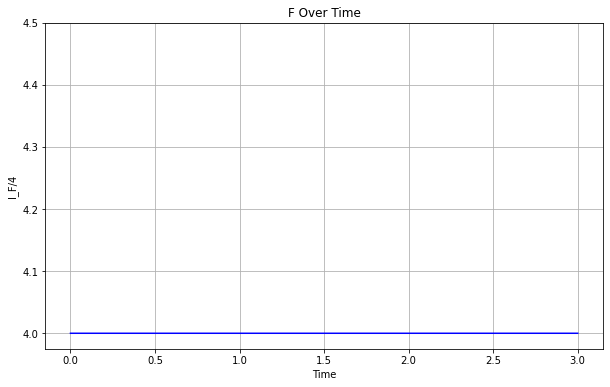

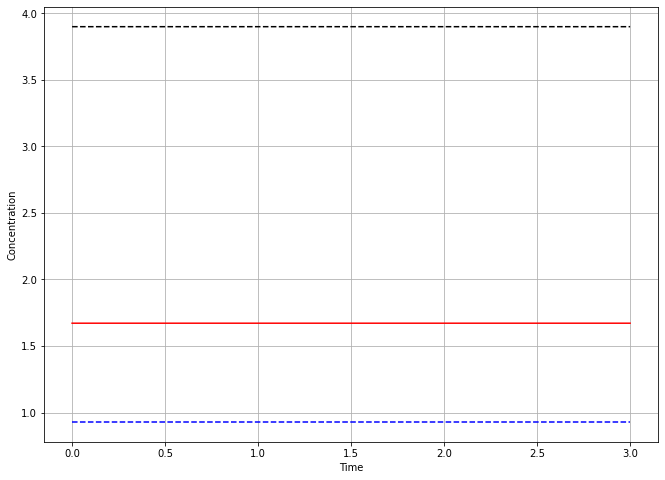

In [185]:
plt.figure(figsize=(10, 6))
plt.plot(t, F_values, label='F over time', color='blue', linestyle='-', markersize=5)
plt.xlabel('Time')
plt.ylabel('I_F/4')
plt.title('F Over Time')
plt.ylim(3.975,4.5)
plt.grid()

plt.figure(figsize=(11, 8))
plt.plot(t, s[:,0],'--', color='blue',label = 'A')
plt.plot(t, s[:,1], color='red',label = 'B')
plt.plot(t, s[:,2],'--', color='k',label = 'C')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.grid()
plt.show()
